### Practical Data Science with Python Assignment 2

 Name : Thimira Dulshan Gunathilaka Masiyage Don <br> ID : s3758709

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import preprocessing

#displayig all columns in the data set
pd.set_option('display.max_columns',None)

Read the data in csv format

In [2]:
mice_protein=pd.read_csv('Protein.csv')

In [3]:
mice_protein.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

#### Data set Information ([Source](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression))

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse. <br><br>
The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.<br><br>

Classes: <br>
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) <br>
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) <br>
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) <br>
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) <br>
<br>
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) <br>
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) <br>
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) <br>
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)



In [4]:
mice_protein.shape

(1080, 82)

In [5]:
mice_protein['MouseNumber'] = mice_protein.MouseID.apply(lambda x: x.split('_')[0])
mice_protein['MouseVersion'] = mice_protein.MouseID.apply(lambda x: x.split('_')[1])
mice_protein.drop(['MouseID'], axis=1, inplace=True)

In [6]:
mice_protein.head(5)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,MouseNumber,MouseVersion
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,309,1
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,309,2
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,309,3
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,309,4
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,

Re-order columns, mouse number and mouse version come first and rest as in data set

In [7]:
cols_to_order = ['MouseNumber', 'MouseVersion']
new_columns = cols_to_order + (mice_protein.columns.drop(cols_to_order).tolist())
mice_protein = mice_protein[new_columns]
mice_protein.head()

,MouseNumber,MouseVersion,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309,1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309,2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309,3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309,4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309,5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.2

#### checking missing values in dataset<br>
getting the columns which has missing values generating a boolean array (True if the column has a missing value, False otherwise).

In [8]:
mice_protein.columns[mice_protein.isnull().any()]

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [9]:
mice_protein['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

Change the column value of Ts65Dn to Trisomic

In [10]:
mice_protein['Genotype'].replace('Ts65Dn','Trisomic',inplace=True)

In [11]:
mice_protein['Genotype'].value_counts()

Control     570
Trisomic    510
Name: Genotype, dtype: int64

In [12]:
mice_protein['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [13]:
mice_protein['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [14]:
mice_protein['class'].value_counts()

c-SC-m    150
c-CS-m    150
t-SC-m    135
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Impute the missing values with their means relative to mice class

In [15]:
mean_mouse_values = mice_protein.groupby(by=['class']).mean().reset_index()

In [16]:
mean_mouse_values

,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,c-CS-m,0.480456,0.652587,0.339217,2.381749,4.308540,0.229932,0.182211,2.916187,0.198484,1.492318,0.690865,0.321124,0.339926,0.268076,0.860465,0.682172,1.590753,1.695686,0.440096,0.699964,0.425950,0.366928,0.177160,1.242596,2.857310,1.286822,0.253813,0.271238,0.725980,0.166172,0.396652,2.150045,0.330741,0.477525,0.403777,0.761019,0.595234,0.394016,0.593412,0.410888,0.327668,0.421329,0.322866,0.184475,0.929869,0.166257,1.486330,0.303302,0.460413,1.353630,0.149405,0.164392,0.172690,0.119782,0.158083,0.182401,0.194249,0.123722,0.229861,0.123986,0.520985,0.298304,1.523643,2.141426,0.152442,1.177900,0.866693,0.226911,0.156882,0.132539,0.119782,0.123929,0.467403,0.142027,0.174599,0.178675,1.523659
1,c-CS-s,0.596748,0.772395,0.342315,2.417809,4.280077,0.212423,0.168356,2.935576,0.208439,1.686844,0.821656,0.284451,0.352651,0.256976,0.856397,0.703243,1.597616,2.028768,0.436652,0.643662,0.531708,0.367871,0.177622,1.292778,2.864710,1.353292,0.237929,0.277688,0.705535,0.167997,0.389920,2.228780,0.324796,0.444154,0.366260,0.734667,0.573343,0.393681,0.555874,0.397125,0.321985,0.426282,0.350333,0.190771,0.919926,0.177796,1.714248,0.310063,0.438636,1.369320,0.159351,0.169082,0.187983,0.112512,0.148738,0.162591,0.176151,0.127026,0.227867,0.127734,0.452769,0.288017,1.507502,2.076174,0.146601,1.064265,0.847742,0.214818,0.144670,0.126590,0.112512,0.126954,0.445322,0.145542,0.166534,0.172007,1.617609
2,c-SC-m,0.273203,0.436361,0.290946,2.145633,3.459416,0.241253,0.189547,4.736327,0.208149,1.278566,0.354403,0.338879,0.289561,0.286072,0.801377,0.901992,1.543803,1.155948,0.433865,0.649769,0.264466,0.358820,0.184114,1.036840,2.038041,1.011697,0.230180,0.261075,0.618626,0.168916,0.350869,1.970838,0.620829,0.460957,0.482767,0.828520,0.595682,0.364389,0.575470,0.333277,0.324069,0.401593,0.421325,0.163533,0.988492,0.143977,1.648943,0.269214,0.302601,1.032217,0.155300,0.165196,0.176947,0.128108,0.155323,0.184759,0.184176,0.113834,0.233686,0.128070,0.582127,0.277210,1.638506,2.347967,0.177103,1.403618,0.825483,0.224470,0.169294,0.155980,0.128108,0.143614,0.456874,0.185664,0.217339,0.220825,1.009957
3,c-SC-s,0.274823,0.449354,0.313393,2.404974,3.913096,0.233368,0.184975,3.361288,0.214949,1.327714,0.325854,0.309990,0.289603,0.276365,0.871028,0.776878,1.647015,1.203349,0.424304,0.778791,0.267661,0.372599,0.177101,1.230394,2.360867,1.013919,0.240210,0.272528,0.683304,0.169822,0.361185,2.255591,0.856040,0.482234,0.463736,0.789227,0.560641,0.366398,0.596926,0.295666,0.307209,0.389163,0.379492,0.174523,0.918690,0.148062,1.375938,0.276084,0.337684,1.174931,0.235763,0.159796,0.177422,0.132929,0.162248,0.193258,0.217200,0.116623,0.229871,0.127621,0.585375,0.290453,1.531989,2.357227,0.173196,1.271971,0.811364,0.241853,0.156121,0.133082,0.132929,0.135007,0.471512,0.152480,0.200690,0.219120,1.157639
4,t-CS-m,0.619294,0.797007,0.312732,2.196541,3.565960,0.213621,0.173956,3.121801,0.203395,1.563905,0.800128,0.277222,0.320117,0.251732,0.771546,0.561772,1.446360,1.689740,0.460781,0.584380,0.537919,0.328819,0.177874,1.062654,2.293750,1.278817,0.241337,0.259008,0.689220,0.161129,0.434264,2.037305,0.307775,0.398091,0.347339,0.663549,0.547146,0.328300,0.506393,0.337797,0.279186,0.387515,0.392187,0.175644,0.915283,0.167974,1.729557,0.290738,0.479464,1.027436,0.191516,0.158233,0.173730,0.108196,0.147722,0.178334,0.193628,0.118099,0.225670,0.125419,0.498653,0.279923,1.458555,2.218521,0.138106,1.0

In [17]:
target_column = 'class'

def Missing_Values(row, col):
    value = row[col]
    if pd.isnull(value):
        return mean_mouse_values.loc[mean_mouse_values[target_column] == row[target_column], col], True
    return value, False

In [18]:
for i, row in mice_protein.iterrows():
    for col in mice_protein.columns:
        row[col], fixed = Missing_Values(row, col)
    mice_protein.iloc[i] = row

In [19]:
mice_protein.columns[mice_protein.isnull().any()]

Index([], dtype='object')

Summary statistics 

In [20]:
mice_protein.groupby(by=['class']).describe()

DYRK1A_N                                                              \
          count      mean       std       min       25%       50%       75%   
class                                                                         
c-CS-m    150.0  0.480456  0.129722  0.233551  0.377967  0.472297  0.569495   
c-CS-s    135.0  0.596748  0.529338  0.252985  0.354792  0.414939  0.512927   
c-SC-m    150.0  0.273203  0.047923  0.145327  0.247919  0.275085  0.306878   
c-SC-s    135.0  0.274823  0.046671  0.170634  0.239992  0.274443  0.304195   
t-CS-m    135.0  0.619294  0.156636  0.358105  0.489940  0.613747  0.714399   
t-CS-s    105.0  0.525735  0.139950  0.324104  0.426918  0.474926  0.583923   
t-SC-m    135.0  0.329861  0.078622  0.191464  0.283766  0.324465  0.362772   
t-SC-s    135.0  0.337488  0.073700  0.163325  0.278546  0.346594  0.389988   

                 ITSN1_N                                                    \
             max   count      mean       std       min       25%       50%   
class                                                                        
c-CS-m  0.784226   150.0  0.652587  0.153911  0.359422  0.540118  0.640591   
c-CS-s  2.516367   135.0  0.772395  0.503299  0.390374  0.526029  0.612273   
c-SC-m  0.380145   150.0  0.436361  0.068982  0.245359  0.394318  0.437696   
c-SC-s  0.387123   135.0  0.449354  0.074120  0.264085  0.394680  0.454752   
t-CS-m  0.992220   135.0  0.797007  0.187409  0.463231  0.666030  0.786627   
t-CS-s  0.941415   105.0  0.759556  0.154217  0.519011  0.643689  0.732011   
t-SC-m  0.940956   135.0  0.566783  0.077883  0.376161  0.516692  0.567582   
t-SC-s  0.500643   135.0  0.549056  0.110211  0.328405  0.475547  0.549056   

                           BDNF_N                                          \
             75%       max  count      mean       std       min       25%   
class                                                                       
c-CS-m  0.749234  1.063761  150.0  0.339217  0.046883  0.215843  0.308670   
c-CS-s  0.725113  2.602662  135.0  0.342315  0.054885  0.204932  0.306008   
c-SC-m  0.480310  0.602630  150.0  0.290946  0.038587  0.115181  0.268468   
c-SC-s  0.501492  0.613321  135.0  0.313393  0.043637  0.210627  0.293411   
t-CS-m  0.925604  1.336398  135.0  0.312732  0.051175  0.213702  0.271998   
t-CS-s  0.860404  1.165424  105.0  0.305460  0.043350  0.239984  0.278855   
t-SC-m  0.618076  0.786222  135.0  0.321063  0.033216  0.262756  0.295252   
t-SC-s  0.624317  0.836221  135.0  0.325586  0.056896  0.194160  0.287047   

                                      NR1_N                                \
             50%       75%       max  count      mean       std       min   
class                                                                       
c-CS-m  0.333664  0.366426  0.470056  150.0  2.381749  0.320972  1.711053   
c-CS-s  0.340390  0.374784  0.497160  135.0  2.417809  0.368772  1.548186   
c-SC-m  0.291883  0.316703  0.397491  150.0  2.145633  0.286331  1.403329   
c-SC-s  0.314812  0.338450  0.417221  135.0  2.404974  0.353018  1.440279   
t-CS-m  0.317112  0.342015  0.466673  135.0  2.196541  0.379840  1.441955   
t-CS-s  0.295108  0.331712  0.464848  105.0  2.184606  0.275957  1.739887   
t-SC-m  0.318074  0.344573  0.405282  135.0  2.379446  0.258372  1.787655   
t-SC-s  0.325586  0.368543  0.443358  135.0  2.248742  0.377737  1.330831   

                                               NR2A_N                      \
             25%       50%       75%       max  count      mean       std   
class                                                                       
c-CS-m  2.095372  2.391115  2.624837  3.073847  150.0  4.308540  0.973575   
c-CS-s  2.132741  2.393446  2.669406  3.757641  135.0  4.280077  1.001889   
c-SC-m  1.908059  2.124527  2.375649  2.814321  150.0  3.459416  0.670048   
c-SC-s  2.214266  2.442128  2.635396  3.164237  135.0  3.913096  0.872614   
t-CS-m  1.944008  2.217863  2.431331  3.100

## Data Exploration

#### Univariate Exploartion

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

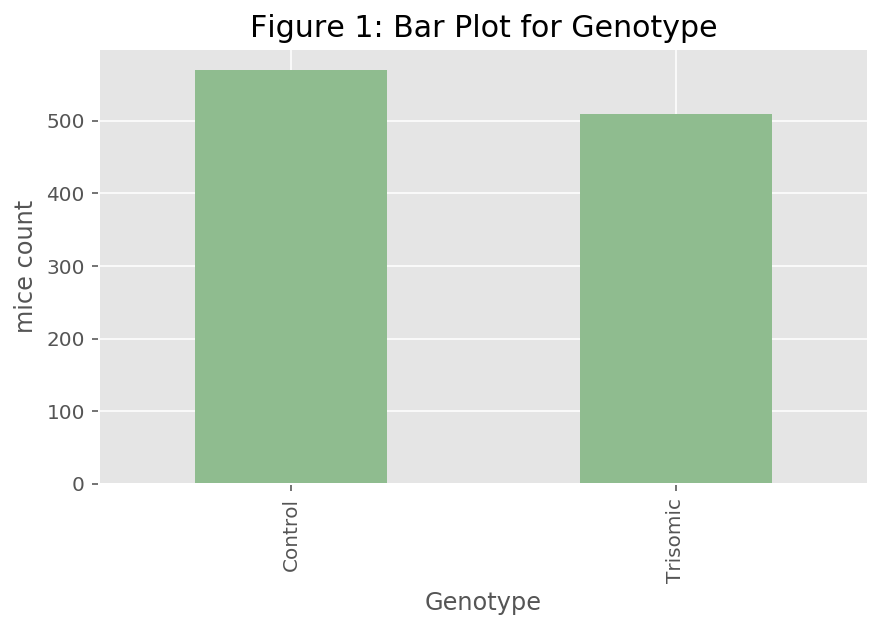

In [22]:
ax = mice_protein['Genotype'].value_counts().plot(kind = 'bar',color = 'darkseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Plot for Genotype', fontsize = 15)
plt.xlabel('Genotype')
plt.ylabel('mice count')
plt.show();

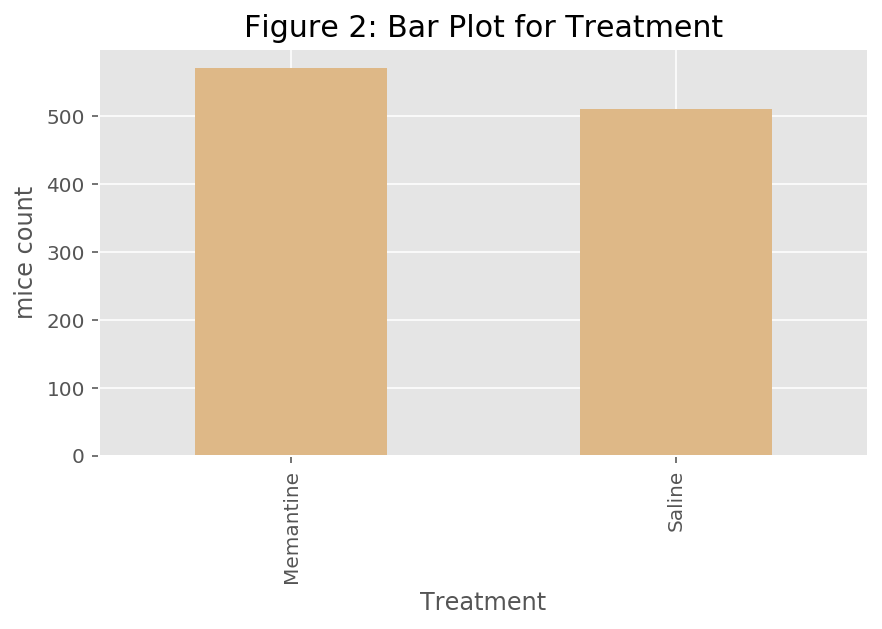

In [23]:
ax = mice_protein['Treatment'].value_counts().plot(kind = 'bar',color = 'burlywood')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 2: Bar Plot for Treatment', fontsize = 15)
plt.xlabel('Treatment')
plt.ylabel('mice count')
plt.show();

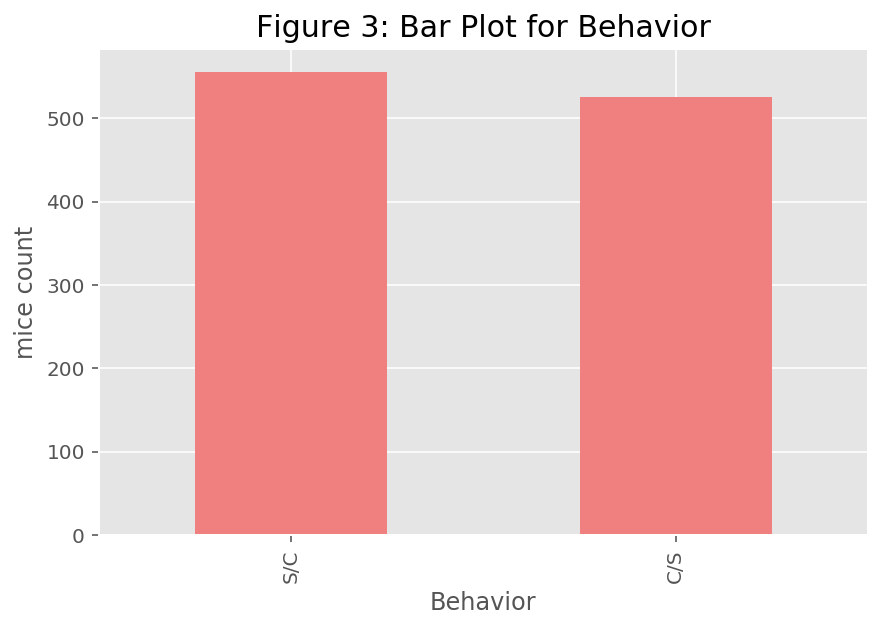

In [24]:
ax = mice_protein['Behavior'].value_counts().plot(kind = 'bar',color='lightcoral')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 3: Bar Plot for Behavior', fontsize = 15)
plt.xlabel('Behavior')
plt.ylabel('mice count')
plt.show();

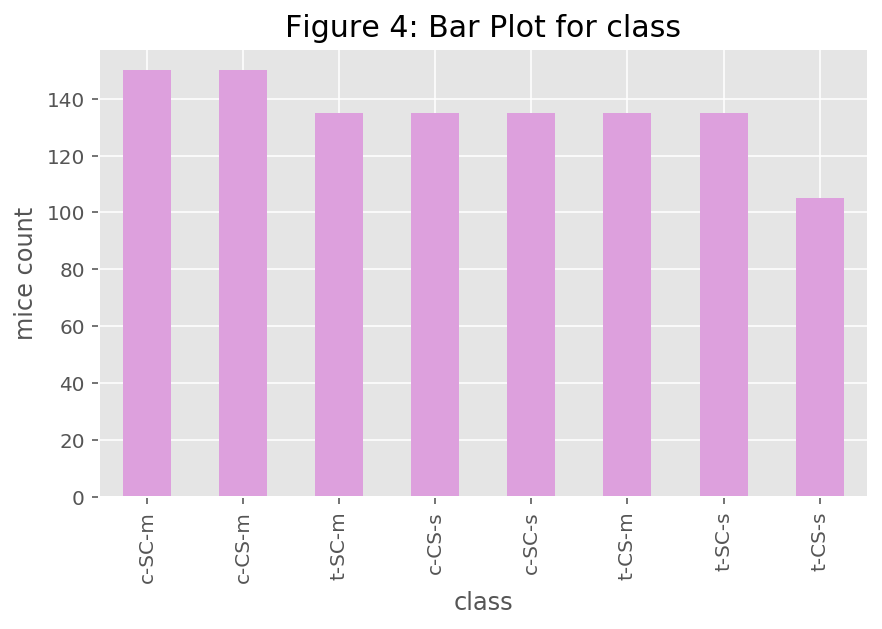

In [25]:
ax = mice_protein['class'].value_counts().plot(kind = 'bar',color = 'plum')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 4: Bar Plot for class', fontsize = 15)
plt.xlabel('class')
plt.ylabel('mice count')
plt.show();

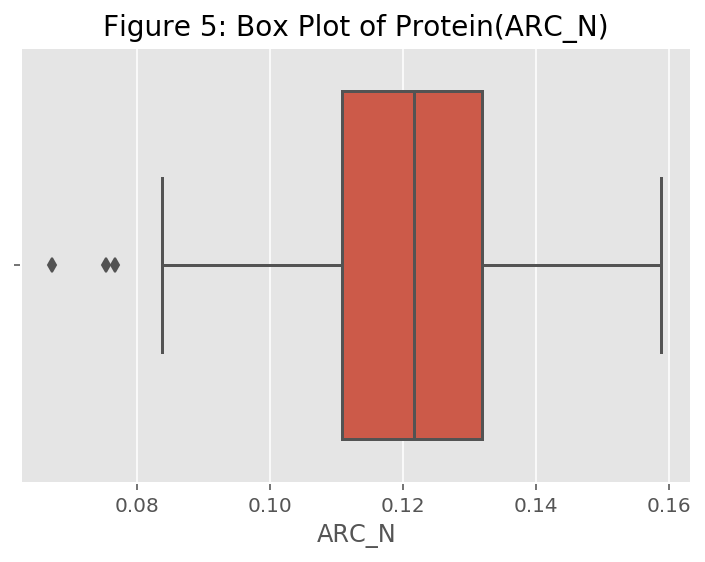

In [26]:
sns.boxplot(mice_protein['ARC_N']).set_title('Figure 5: Box Plot of Protein(ARC_N)', fontsize = 14)
plt.show();

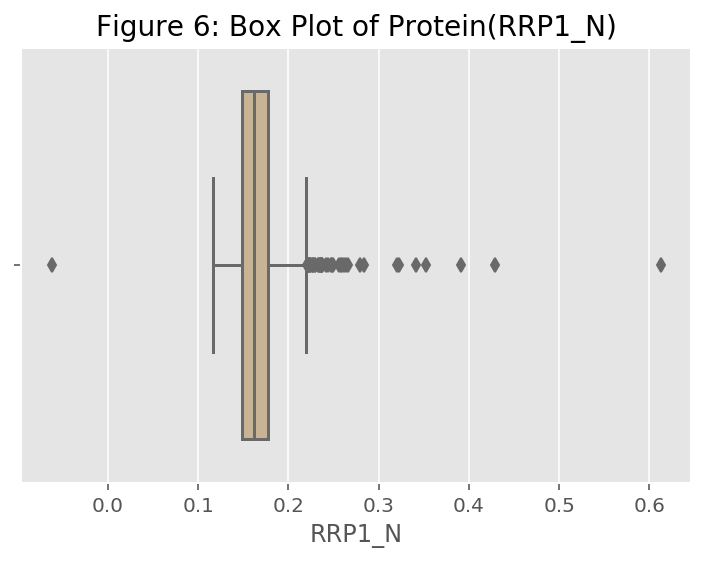

In [27]:
sns.boxplot(mice_protein['RRP1_N'],color='tan').set_title('Figure 6: Box Plot of Protein(RRP1_N)', fontsize = 14)
plt.show();

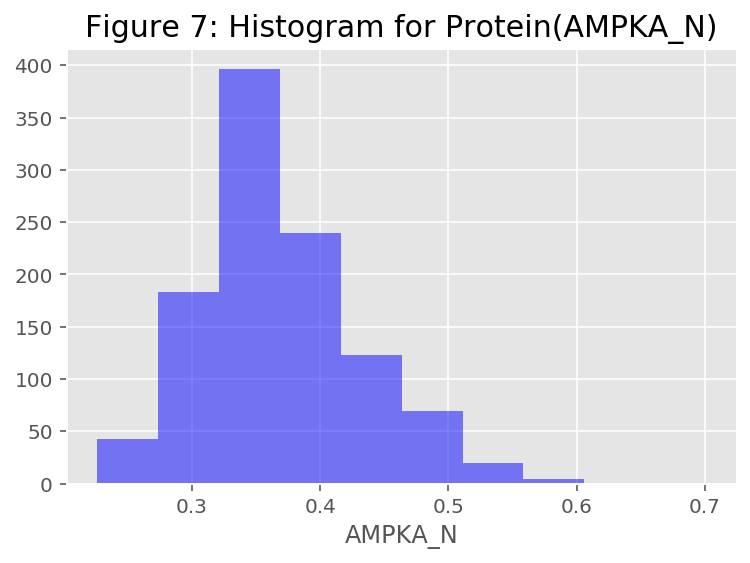

In [28]:
x=mice_protein['AMPKA_N']
plt.hist(x, facecolor='blue', alpha=0.5)
plt.title('Figure 7: Histogram for Protein(AMPKA_N)', fontsize = 15)
plt.xlabel('AMPKA_N')
plt.show();

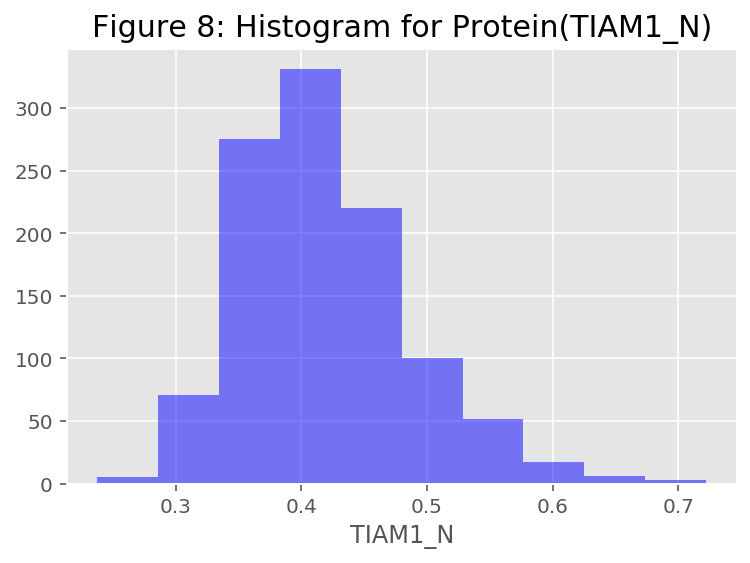

In [29]:
x=mice_protein['TIAM1_N']
plt.hist(x, facecolor='blue', alpha=0.5)
plt.title('Figure 8: Histogram for Protein(TIAM1_N)', fontsize = 15)
plt.xlabel('TIAM1_N')
plt.show();

**Histogram with Kernel Density Estimate for selected Proteins**

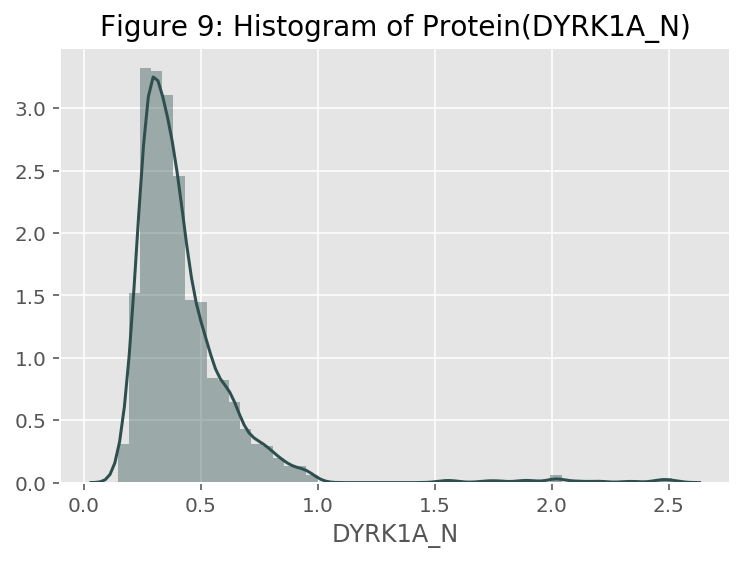

In [30]:
sns.distplot(mice_protein['DYRK1A_N'], kde = True,color='darkslategrey').set_title('Figure 9: Histogram of Protein(DYRK1A_N)', fontsize = 14)
plt.show();

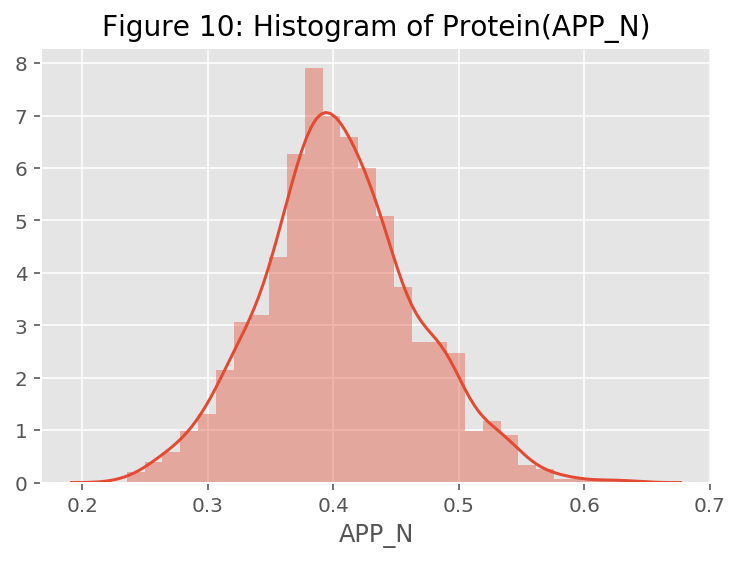

In [31]:
sns.distplot(mice_protein['APP_N'], kde = True).set_title('Figure 10: Histogram of Protein(APP_N)', fontsize = 14)
plt.show();

#### Bivariate Exploartions

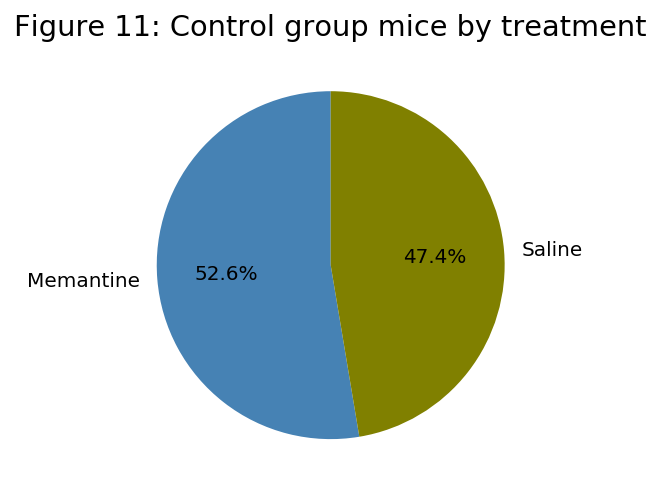

In [32]:
#Hypothesis: The proportion of Mematine treatment mice are larger in the Control group than the mice with Saline treatment.
Memantine = mice_protein[mice_protein["Treatment"] == "Memantine"]
Saline = mice_protein[mice_protein["Treatment"] == "Saline"]

memaControl = sum(Memantine['Genotype']=='Control')
salControl = sum(Saline['Genotype']=='Control')

b = ('Memantine', 'Saline')
h = [memaControl, salControl]

colors = ['steelblue', 'olive']
plt.pie(h, labels=b, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Figure 11: Control group mice by treatment')
plt.show()

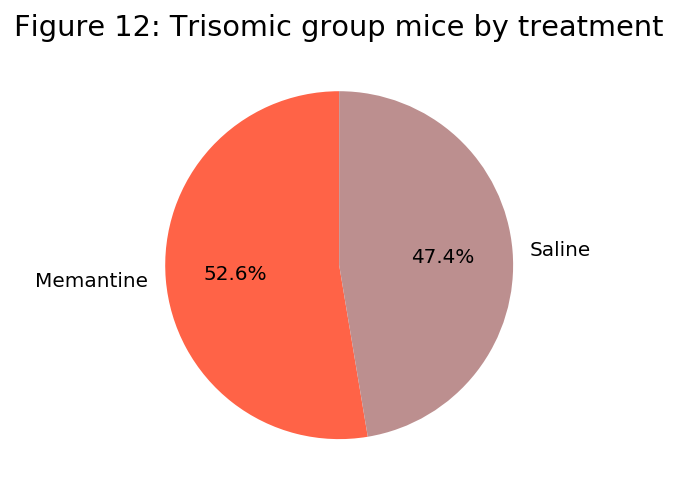

In [33]:
#Hypothesis: The proportion of Mematine treatment mice are larger than the mice with Saline treatment in the Trisomic group.
Memantine = mice_protein[mice_protein["Treatment"] == "Memantine"]
Saline = mice_protein[mice_protein["Treatment"] == "Saline"]

memaTri = sum(Memantine['Genotype']=='Trisomic')
salTri = sum(Saline['Genotype']=='Trisomic')

b = ('Memantine', 'Saline')
h = [memaControl, salControl]

colors = ['tomato', 'rosybrown']
plt.pie(h, labels=b, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Figure 12: Trisomic group mice by treatment')
plt.show()

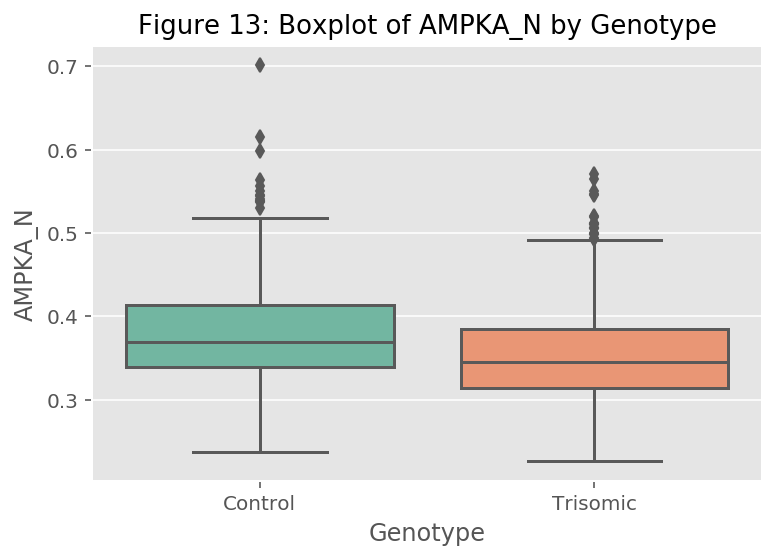

In [34]:
#Hypothesis AMPKA_N is more present in  Trisomic than Control Mice group

sns.boxplot(mice_protein['Genotype'], mice_protein['AMPKA_N'],palette="Set2");
plt.title('Figure 13: Boxplot of AMPKA_N by Genotype', fontsize = 13)
plt.show();

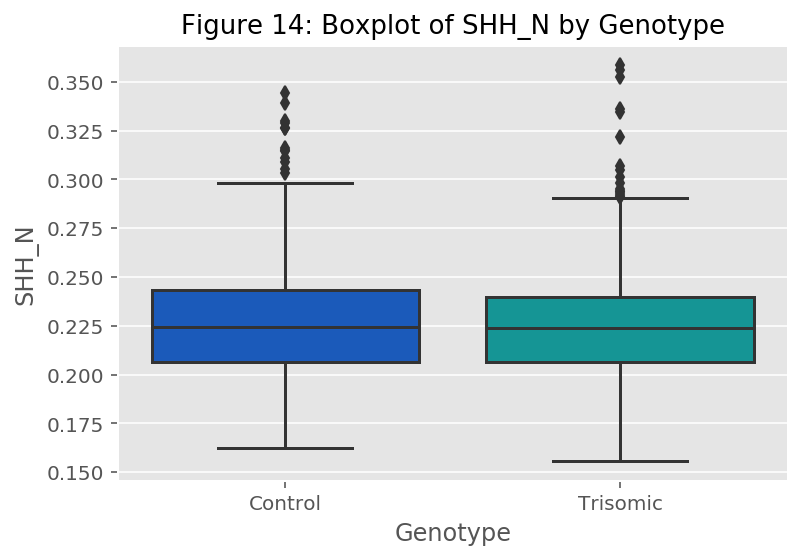

In [35]:
#Hypothesis pAKT_N is more present in Trisomic Mice than Control Mice group

sns.boxplot(mice_protein['Genotype'], mice_protein['SHH_N'],palette="winter");
plt.title('Figure 14: Boxplot of SHH_N by Genotype', fontsize = 13)
plt.show();

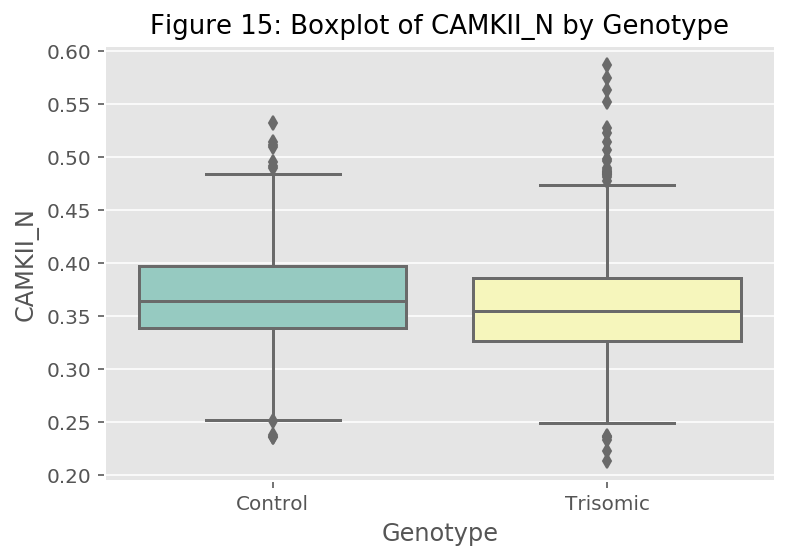

In [36]:
#Hypothesis CAMKII_N is more present in Trisomic Mice than Control Mice group

sns.boxplot(mice_protein['Genotype'], mice_protein['CAMKII_N'],palette="Set3");
plt.title('Figure 15: Boxplot of CAMKII_N by Genotype', fontsize = 13)
plt.show();

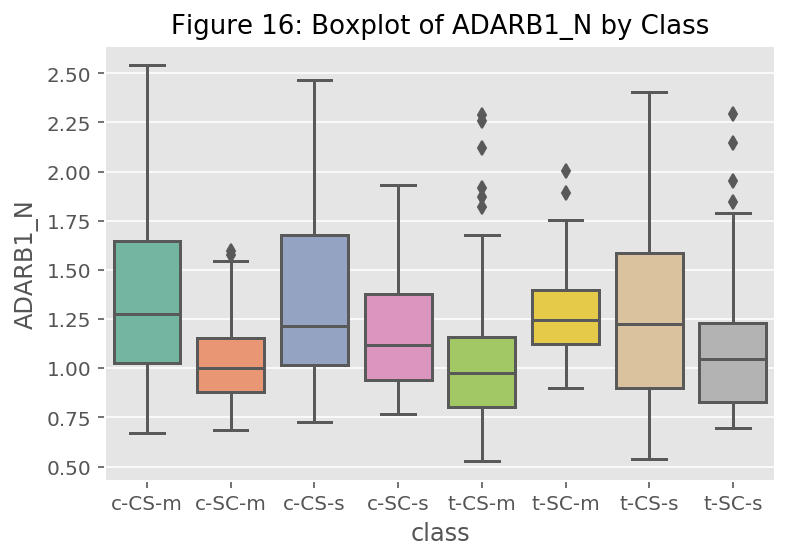

In [37]:
#Hypothesis: ADARB1_N is present more in t-CS-m than t-SC-m
sns.boxplot(mice_protein['class'], mice_protein['ADARB1_N'],palette="Set2");
plt.title('Figure 16: Boxplot of ADARB1_N by Class', fontsize = 13)
plt.show();

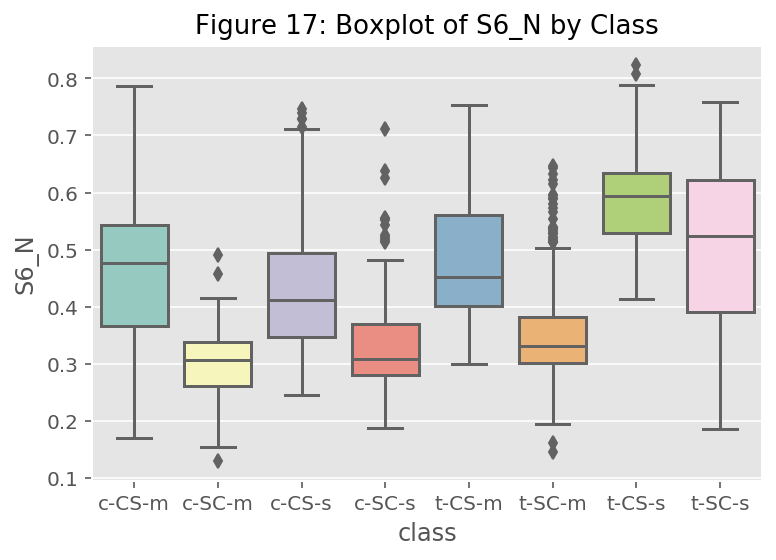

In [38]:
#Hypothesis: S6_N is present more in t-CS-m than t-SC-m
sns.boxplot(mice_protein['class'], mice_protein['S6_N'],palette="Set3");
plt.title('Figure 17: Boxplot of S6_N by Class', fontsize = 13)
plt.show();

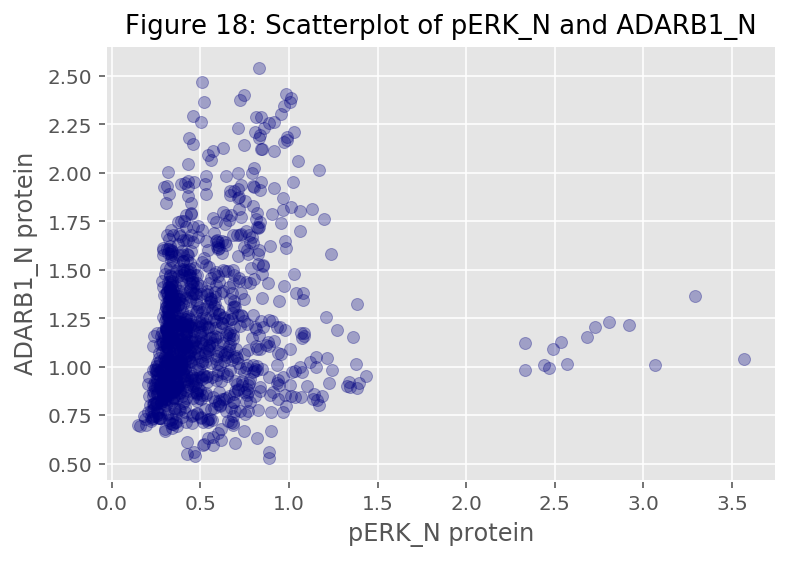

In [39]:
#Hypothesis: There is a correlation between pERK_N and ADARB1_N proteins. 
cons = mice_protein['pERK_N']
plt.scatter(cons, mice_protein['ADARB1_N'], alpha = 0.3,color='navy')
plt.title('Figure 18: Scatterplot of pERK_N and ADARB1_N', fontsize = 13)
plt.xlabel('pERK_N protein')
plt.ylabel('ADARB1_N protein')
plt.show();

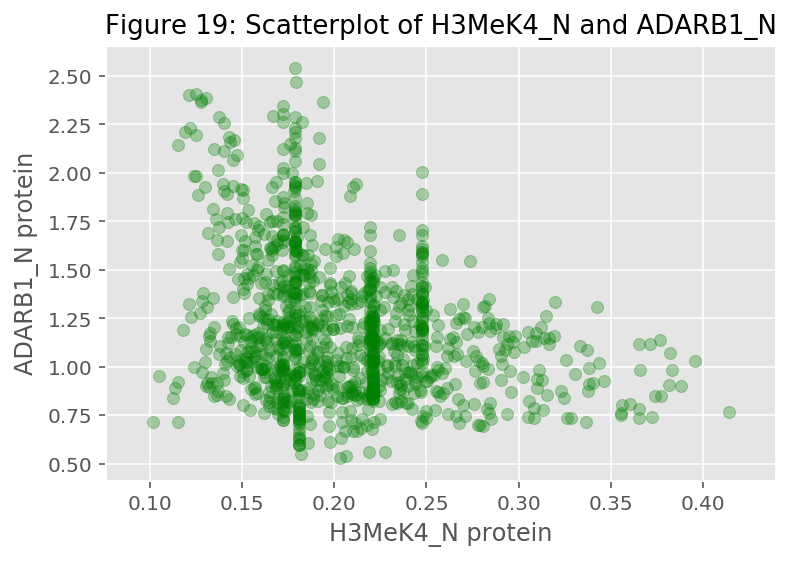

In [40]:
#Hypothesis: There is a correlation between H3MeK4_N and ADARB1_N proteins. 
cons = mice_protein['H3MeK4_N']
plt.scatter(cons, mice_protein['ADARB1_N'], alpha = 0.3,color='green')
plt.title('Figure 19: Scatterplot of H3MeK4_N and ADARB1_N', fontsize = 13)
plt.xlabel('H3MeK4_N protein')
plt.ylabel('ADARB1_N protein')
plt.show();

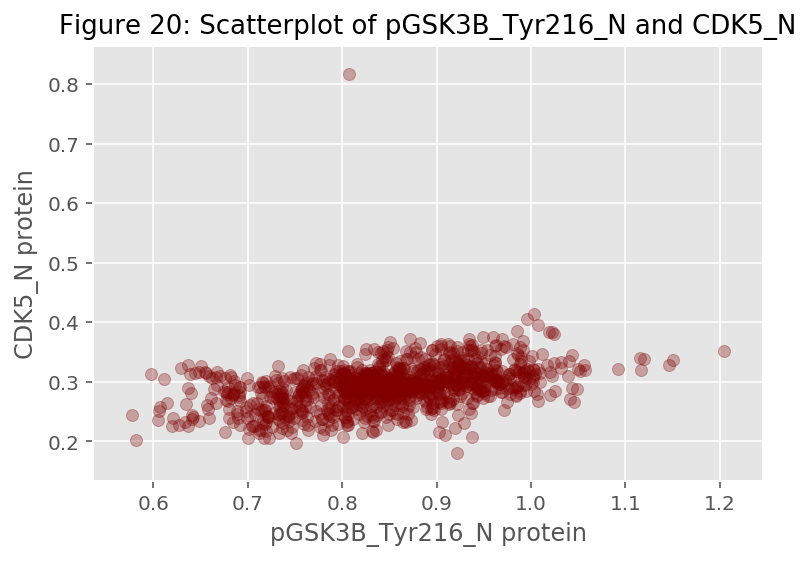

In [41]:
#Hypothesis: There is a correlation between H3MeK4_N and ADARB1_N proteins. 
cons = mice_protein['pGSK3B_Tyr216_N']
plt.scatter(cons, mice_protein['CDK5_N'], alpha = 0.3,color='maroon')
plt.title('Figure 20: Scatterplot of pGSK3B_Tyr216_N and CDK5_N', fontsize = 13)
plt.xlabel('pGSK3B_Tyr216_N protein')
plt.ylabel('CDK5_N protein')
plt.show();

## Data Modelling

To performe machine learing algorithms we need to remove columns like mouse number and mouse version. After removing these columns data will be divided in to two parts. Target column and rest of the data as one data set.

In [42]:
Removed_columns=['MouseNumber','MouseVersion']
traget_columns=['Genotype','Treatment','Behavior','class']
#data set without mouse number and mouse version column
Protein_df=mice_protein.copy()
Data_Proteins=Protein_df.drop(Removed_columns+traget_columns, axis=1)
#Target columns 
target=Protein_df['class']

Only Proteins columns are included in Data_Proteins data set

In [43]:
Data_Proteins.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.132539

In [44]:
Data_Proteins.shape

(1080, 77)

Target columns are included in target data set.

In [45]:
target.head()

0    c-CS-m
1    c-CS-m
2    c-CS-m
3    c-CS-m
4    c-CS-m
Name: class, dtype: object

In [46]:
from sklearn import preprocessing

##### Encoding target features before perform any machine learning algorithms

In [47]:
le = preprocessing.LabelEncoder()
le_fit = le.fit(target)
target_encoded_le = le_fit.transform(target)

In [48]:
print("Target Type:", type(target))

print("Counts Using NumPy:")
print(np.unique(target_encoded_le, return_counts = True))

print("Counts Using Pandas:")
print(pd.Series(target_encoded_le).value_counts())

Target Type: <class 'pandas.core.series.Series'>
Counts Using NumPy:
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([150, 135, 150, 135, 135, 105, 135, 135], dtype=int64))
Counts Using Pandas:
2    150
0    150
7    135
6    135
4    135
3    135
1    135
5    105
dtype: int64


#### Scalling discriptive features

In [49]:
Data_Proteins_scaler = preprocessing.MinMaxScaler().fit(Data_Proteins)
Data = Data_Proteins_scaler.transform(Data_Proteins)

## Feature selection using random forest importance (RFI)

The random forest importance (RFI) method is a filter feature selection method that uses the total decrease in node impurities from splitting on a particular feature as averaged over all decision trees in the ensemble. For classification, the node impurity is measured by the Gini index and for regression, it is measured by residual sum of squares.

We'll take a look at the most relevant 30 features and how they contribute towards the prediction.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection as fs

Take out best 30 features

In [51]:
num_features=30

In [52]:
model_rfi = RandomForestClassifier(n_estimators=100,random_state=9)
model_rfi.fit(Data,target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_Proteins.columns[fs_indices_rfi].values
best_features_rfi

array(['SOD1_N', 'pERK_N', 'pPKCG_N', 'APP_N', 'CaNA_N', 'ITSN1_N',
       'Ubiquitin_N', 'pCAMKII_N', 'pPKCAB_N', 'pS6_N', 'BRAF_N', 'P38_N',
       'Tau_N', 'AcetylH3K9_N', 'DYRK1A_N', 'pNUMB_N', 'ARC_N',
       'H3AcK18_N', 'AKT_N', 'pP70S6_N', 'BCL2_N', 'S6_N', 'pGSK3B_N',
       'MTOR_N', 'IL1B_N', 'RAPTOR_N', 'H3MeK4_N', 'ADARB1_N', 'pNR2A_N',
       'nNOS_N'], dtype=object)

In [53]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.05845374, 0.04093169, 0.03757615, 0.03098873, 0.02807918,
       0.02806234, 0.02605482, 0.02541493, 0.02391784, 0.02349604,
       0.0221795 , 0.02173518, 0.02097134, 0.01995373, 0.01983105,
       0.01960307, 0.01914734, 0.0188085 , 0.01745588, 0.01694595,
       0.01663113, 0.01611639, 0.01527658, 0.0136362 , 0.01344162,
       0.01226763, 0.01185042, 0.0116718 , 0.01156476, 0.01084509])

In [54]:
import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [55]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'green')

alt.Chart(...)

### Train - Test Splitting

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
print(Data.shape)
print(target.shape)

(1080, 77)
(1080,)


In [58]:
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state=7
                                                   )

print(D_train.shape)
print(D_test.shape)

(756, 77)
(324, 77)


### Model Evaluation Strategy

In [59]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

cv_method = RepeatedKFold(n_splits=5,n_repeats=3,random_state=9)

#### HYPER PARAMETER TUNNING

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100,random_state=4)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [61]:
from sklearn.pipeline import Pipeline

#### Random Forest parameter tuning

In [62]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', RandomForestClassifier(n_estimators=100, random_state=111))])

params_pipe_RF = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__criterion': ['gini','entropy'],
                  'dt__max_depth': [10,11,12],
                  'dt__min_samples_split': [3,4,5,6,10,15]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=1) 

gs_pipe_RF.fit(D_train, t_train);

Fitting 15 folds for each of 108 candidates, totalling 1620 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 1620 out of 1620 | elapsed:  3.2min finished


In [63]:
gs_pipe_RF.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 11,
 'dt__min_samples_split': 6,
 'rfi_fs__n_features_': 77}

In [64]:
gs_pipe_RF.best_score_

0.9753086419753086

In [65]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [66]:
results_NB = get_search_results(gs_pipe_RF)
results_NB.head()

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
29,0.975317,0.0139378,0.993421,0.947368,gini,11,6,77
8,0.974878,0.0185608,1,0.933775,gini,10,5,77
11,0.974875,0.0162145,1,0.94702,gini,10,6,77
44,0.974872,0.0187364,1,0.927152,gini,12,5,77
26,0.974434,0.0200335,1,0.927152,gini,11,5,77


In [67]:
results_RF = get_search_results(gs_pipe_RF)

results_RF_77_features = results_RF[results_RF['rfi_fs__n_features_'] == 77.0]

alt.Chart(results_RF_77_features, 
          title='RF Performance Comparison with 77 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

#### K-NEAREST NEIGHBOUR (KNN) parameter tuning

In [68]:
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2,3,5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='accuracy',
                           verbose=1) 

gs_pipe_KNN.fit(D_train, t_train);

Fitting 15 folds for each of 60 candidates, totalling 900 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-2)]: Done 900 out of 900 | elapsed:   58.2s finished


In [69]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'rfi_fs__n_features_': 20}

In [70]:
gs_pipe_KNN.best_score_

0.9933862433862434

In [71]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
1,0.993386,0.007249,1.0,0.973510,1.0,1.0,20.0
5,0.992073,0.006457,1.0,0.980263,1.0,2.0,77.0
8,0.991190,0.007088,1.0,0.973684,1.0,3.0,77.0
4,0.990749,0.008631,1.0,0.973510,1.0,2.0,20.0
11,0.988544,0.008839,1.0,0.967105,1.0,5.0,77.0


In [72]:
results_KNN_20_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_KNN_20_features, 
          title='KNN Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

## PERFORMANCE COMPARISON
Here we focus on comparing the different classifiers we used earlier using our reserved test data with their best hyperparameters. The Scoring system is roc_auc as mentioned earlier as well. 

In [73]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedKFold(n_splits=5,n_repeats=3,random_state=9)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_KNN.mean()

0.9300641025641027

In [74]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_RF.mean()

0.8898557692307693

In [75]:
from scipy import stats
print('T test Results for KNN and RF')
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))

T test Results for KNN and RF
Ttest_relResult(statistic=3.8929267079245746, pvalue=0.001624212271719213)


In [76]:
pred_KNN = gs_pipe_KNN.predict(D_test)

In [77]:
pred_RF = gs_pipe_RF.predict(D_test)

In [78]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))

print("\nClassification report for Random Forest") 
print(metrics.classification_report(t_test, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        50
      c-CS-s       1.00      1.00      1.00        45
      c-SC-m       1.00      1.00      1.00        37
      c-SC-s       1.00      1.00      1.00        39
      t-CS-m       1.00      0.98      0.99        43
      t-CS-s       0.97      1.00      0.99        34
      t-SC-m       1.00      1.00      1.00        44
      t-SC-s       1.00      1.00      1.00        32

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Classification report for Random Forest
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        50
      c-CS-s       0.98      1.00      0.99        45
      c-SC-m       1.00      0.97      0.99        37
      c-SC-s       1.00      1.00      1.00  

In [79]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))


print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[50  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0]
 [ 0  0  0  0 42  1  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 32]]

Confusion matrix for Random Forest
[[50  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  1  0]
 [ 0  0  0 39  0  0  0  0]
 [ 0  1  0  0 42  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 32]]
